<a href="https://colab.research.google.com/github/MANDOJU1/pandas/blob/main/4_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 타이타닉

- 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선
- 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰
- 사고로 1,514명이 사망(승선 인원은 2,223명)

<img src="https://i.namu.wiki/i/esZDi-V-CDF_87M2QqUvsB3jliWoNpzyN5YN_54M86fCedEdzyvrtPX16XdjfLkEn0pIwiXzbpQ7ijBKIa1Lrw.webp" width="565" height="362">

In [1]:
!pip install koreanize_matplotlib

# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.7 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
# 한글 폰트 설정
import koreanize_matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.simplefilter(action='ignore')

In [3]:
import matplotlib.font_manager as fm
for fpath in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
  fm.fontManager.addfont(fpath)

plt.rc("font",family='NanumBarunGothic')

## 데이터 로드

In [4]:
titanic_df = sns.load_dataset('titanic')

## 데이터 탐색

In [5]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- survived : 생존여부(0 : 사망, 1 : 생존)
- sibsp : Sibling, Spouse(탑승한 형제 자매 / 배우자 수)
- parch : Parent, Child (탑승한 부모 / 자녀의 수)
- Pclass : 1st=Upper, 2nd=Middle, 3rd=Lower(1에 가까울수록 좋은 자리)
- Embarked : C = Cherbourg, Q = Queenstown, S = Southampton (승선지)
- who : man, woman, child
- fare : 요금
- deck : cabin 객실번호

In [ ]:
titanic_df.shape

(891, 15)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 누락 값 합계 보기

titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 누락값을 제외하고 기술통계 요약 정보 보기

In [ ]:
titanic_df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


### 데이터 질문

#### 클래스별(1,2,3 - First, Second, Third)로 몇 명의 탑승객인가?

In [7]:
# class group

titanic_df.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [9]:
# 표준편차

titanic_df.groupby("class").std(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


####  countplot 을 이용
- color_palette(https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

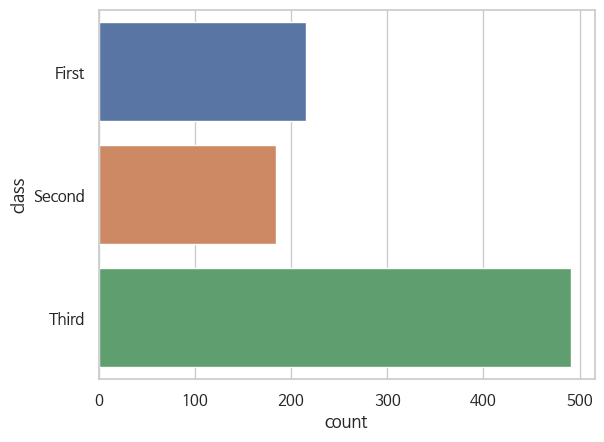

In [11]:
sns.countplot(data = titanic_df, y="class", hue="class");

Text(0.5, 1.0, 'alone 탑승자')

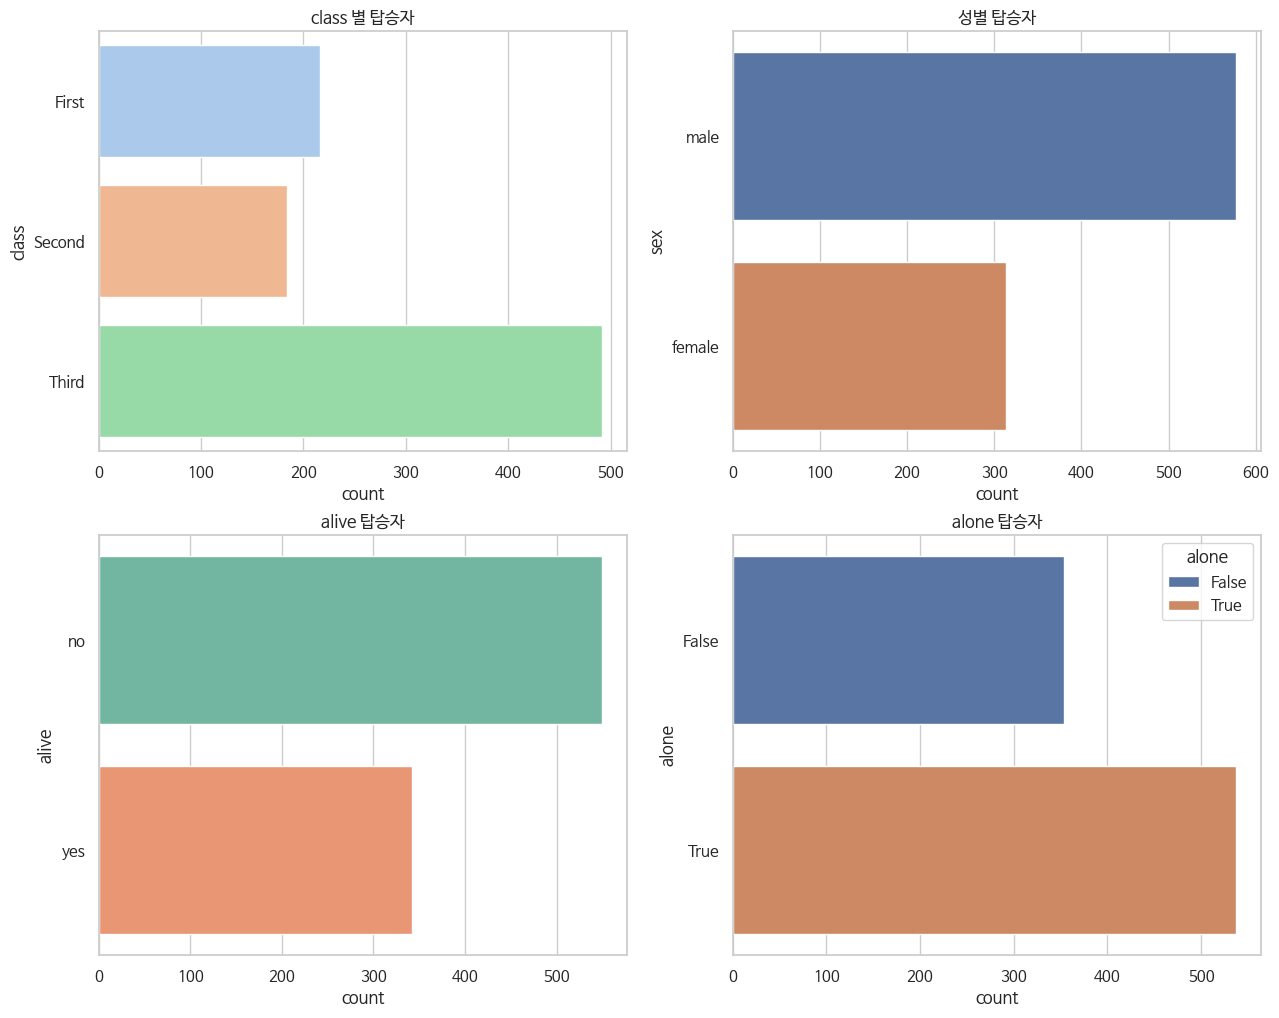

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,12))

sns.countplot(data = titanic_df, y="class", hue="class", ax=ax[0,0], palette="pastel");
ax[0,0].set_title("class 별 탑승자")

sns.countplot(data = titanic_df, y="sex", hue="sex", ax=ax[0,1]);
ax[0,1].set_title("성별 탑승자")

sns.countplot(data = titanic_df, y="alive", hue="alive", ax=ax[1,0], palette="Set2");
ax[1,0].set_title("alive 탑승자")

sns.countplot(data = titanic_df, y="alone", hue="alone", ax=ax[1,1]);
ax[1,1].set_title("alone 탑승자")

####  승객들이 클래스별로 지불한 요금의 평균값과 중앙값은 얼마인가?

In [17]:
# 평균값
titanic_df.groupby("class")['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [18]:
# 중앙값
titanic_df.groupby("class")['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

#### 생존한 사람 정보 추출

In [28]:
# titanic_df[titanic_df["survived"] == "1"]
titanic_df[titanic_df["alive"] == "yes"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [26]:
titanic_df.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


#### 생존자 중에서 class 별 정보 추출

In [29]:
titanic_df[titanic_df["alive"] == "yes"].groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [30]:
titanic_df[titanic_df["alive"] == "yes"].groupby('class')[['survived','pclass','sex']].count()

,survived,pclass,sex
class,,,
First,136,136,136
Second,87,87,87
Third,119,119,119


#### class 별 age colum의 기술통계요약 정보

In [31]:
titanic_df.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


####  성별을 그룹으로 묶어 age 컬럼에 대한 최소, 중앙값, 최대값

In [32]:
# agg(), aggregate()
titanic_df.groupby('class')['age'].agg(['min','median','max'])

,min,median,max
class,,,
First,0.92,37.0,80.0
Second,0.67,29.0,70.0
Third,0.42,24.0,74.0


#### 나이가 30 세 초과인 승객에 대해 class 별로 그룹으로 묶어 중앙값

In [35]:
titanic_df[titanic_df['age'] > 30].groupby('class').median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


#### 요금 지불 비용이 20보다 작은 승객에 대해 class 별 중앙값

In [37]:
titanic_df[titanic_df['fare'] < 20].groupby('class').median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.0,1.0,38.5,0.0,0.0,0.0000,1.0,1.0
Second,0.0,2.0,30.0,0.0,0.0,13.0000,1.0,1.0
Third,0.0,3.0,25.0,0.0,0.0,7.8958,1.0,1.0


#### class 별, sex 별 나이의 중앙값

In [38]:
titanic_df.groupby(['class','sex'])['age'].median()

class   sex   
First   female    35.0
        male      40.0
Second  female    28.0
        male      30.0
Third   female    21.5
        male      25.0
Name: age, dtype: float64

In [39]:
# 인덱스를 컬럼으로 변경

titanic_df.groupby(['class','sex'])['age'].median().unstack()

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


#### 성별로 나누어 나이대 분포도

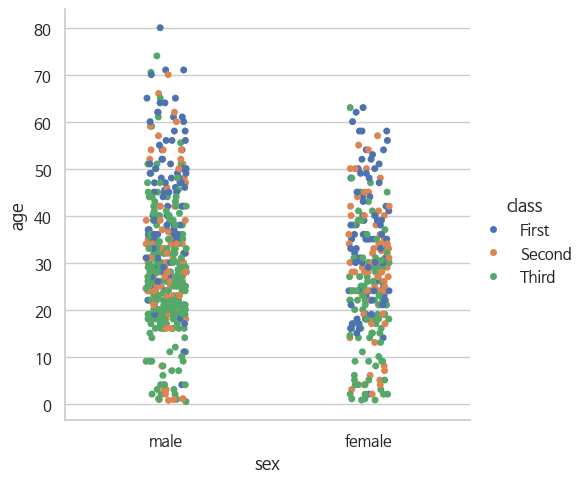

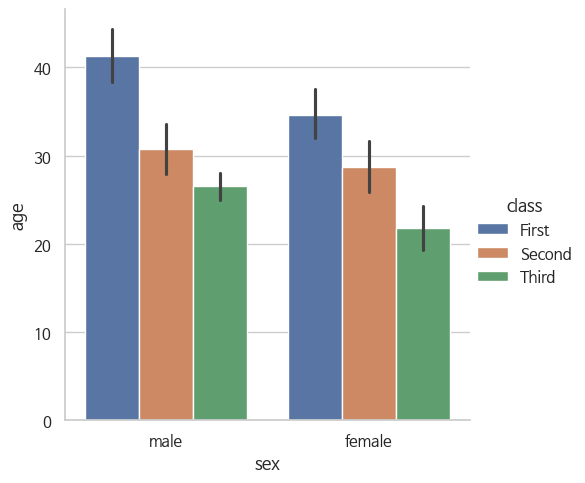

In [41]:
# catplot() : 카테고리 별 차트 작성

sns.catplot(y="age", x="sex", data=titanic_df, hue="class");
sns.catplot(y="age", x="sex", data=titanic_df, hue="class", kind="bar");

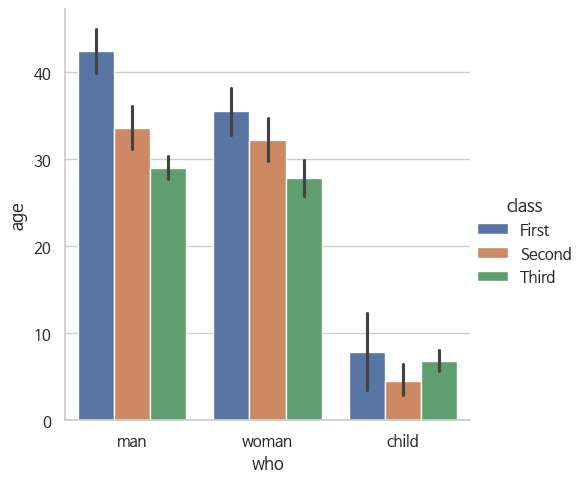

In [42]:
sns.catplot(y="age", x="who", data=titanic_df, hue="class", kind="bar");

#### class 별, sex 별 요금의 중앙값

In [44]:
titanic_df.groupby(['class','sex'])['fare'].median().unstack()

sex,female,male
class,,
First,82.66455,41.2625
Second,22.00000,13.0000
Third,12.47500,7.9250


In [45]:
titanic_df.groupby(['class','who'])['fare'].median().unstack()

who,child,man,woman
class,,,
First,135.775,39.6000,80.000
Second,26.250,13.0000,19.125
Third,21.075,7.8958,9.825


#### 시각화를 통해서 운임 비용 확인

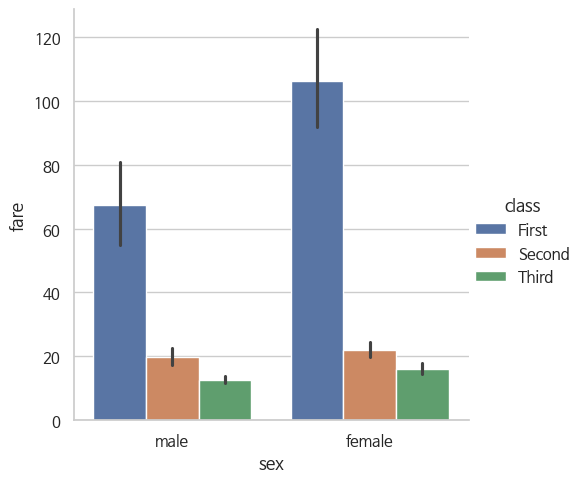

In [46]:
sns.catplot(y="fare", x="sex", data=titanic_df, hue="class", kind="bar");

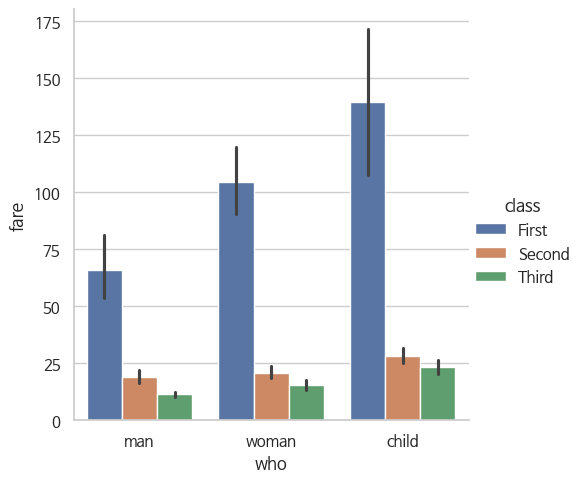

In [47]:
sns.catplot(y="fare", x="who", data=titanic_df, hue="class", kind="bar");

In [49]:
titanic_df.groupby(['class','sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [52]:
# pivot() : 함수사용 X , pivot_table)() : 함수사용 O

titanic_df.pivot_table('survived', index='class', columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


#### 클래스별 생존여부(성별로 그룹지어서 확인)

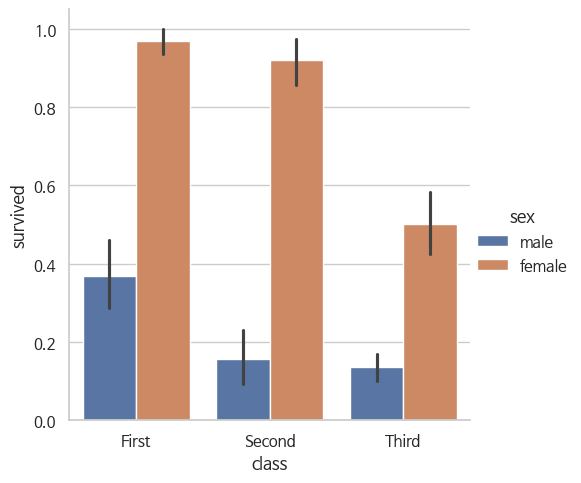

In [53]:
sns.catplot(y="survived", x="class", data=titanic_df, hue="sex", kind="bar")

#### 클래스별 생존여부(who로 그룹지어서 확인)

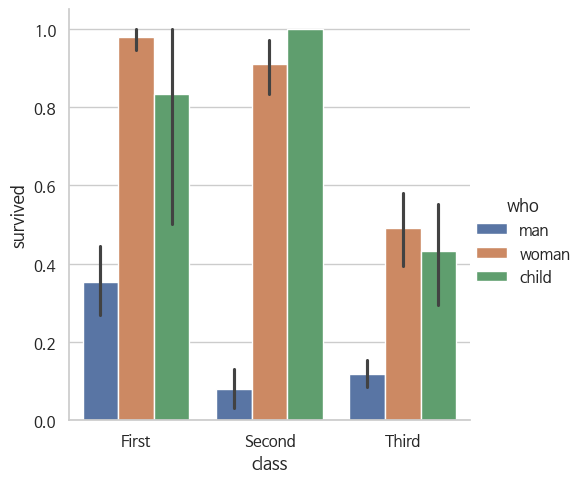

In [54]:
sns.catplot(y="survived", x="class", data=titanic_df, hue="who", kind="bar")

#### 성별로 나누어 특정 나이대의 class 별 생존자

In [57]:
age = pd.cut(titanic_df['age'], [0, 18, 40, 80])


titanic_df.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

#### pd.cut() : 동일 길이로 나누기

- cut(데이터, 구간의 갯수,레이블명)

class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

#### 운임 비용을 3그룹으로 나누어 생존여부를 who,age,  fare,class 기준으로 보기(하지말기)

fare           (-0.512, 170.776]                     (170.776, 341.553]  \
class                      First    Second     Third              First   
who   age                                                                 
child (0, 18]           0.800000  1.000000  0.431034                1.0   
man   (0, 18]           0.500000  0.000000  0.086957                NaN   
      (18, 40]          0.487805  0.063492  0.146199                0.0   
      (40, 80]          0.285714  0.095238  0.064516                0.0   
woman (0, 18]           1.000000  1.000000  0.461538                1.0   
      (18, 40]          0.976190  0.914894  0.480000                1.0   
      (40, 80]          0.956522  0.846154  0.111111                1.0   

fare           (341.553, 512.329]  
class                       First  
who   age                          
child (0, 18]                 NaN  
man   (0, 18]                 NaN  
      (18, 40]                1.0  
      (40, 80]                NaN  
woman (0, 18]                 NaN  
      (18, 40]                1.0  
      (40, 80]                NaN

- 의미있는 정보는 없음

#### 생존자를 대상으로 who 별 어느 class 에 탔는지
- woman 의 경우 First 클래스는 97% 생존율, Second 클래스는 90%, Thire 는 49% 생존율

In [58]:
titanic_df.pivot_table('survived', index="who", columns='class', margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


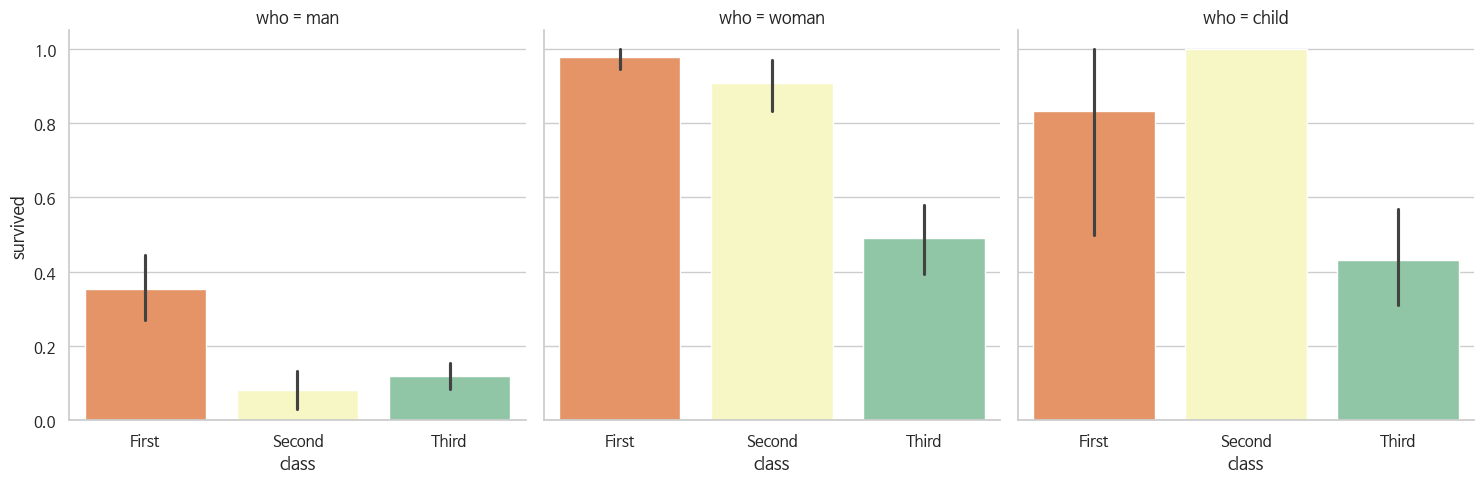

In [60]:
sns.catplot(x='class', y='survived', data=titanic_df, kind="bar", hue="class", col="who",palette="Spectral");

#### 생존자 중 class 별 deck 추출

- 생존자 중에서 층 별로 어느 cabin 에 숙박했는가?

In [61]:
titanic_df.pivot_table('survived', index="deck", columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


#### 시각화 - deck 별 탑승자

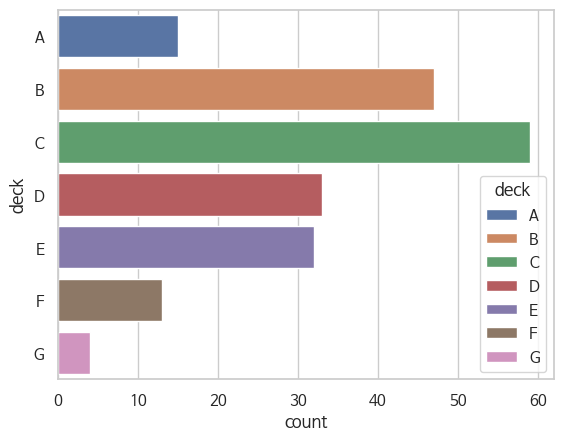

In [63]:
sns.countplot(y="deck", data=titanic_df, hue="deck");

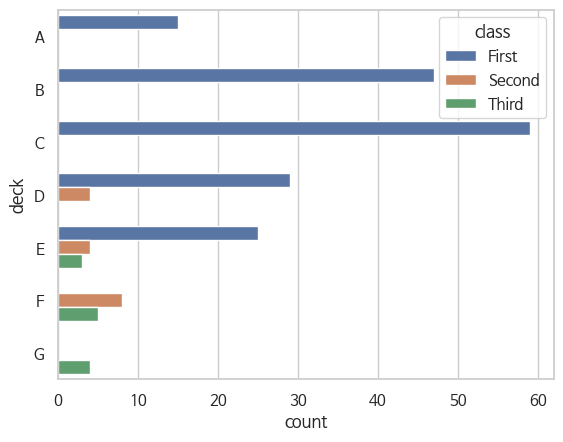

In [64]:
sns.countplot(y="deck", data=titanic_df, hue="class");

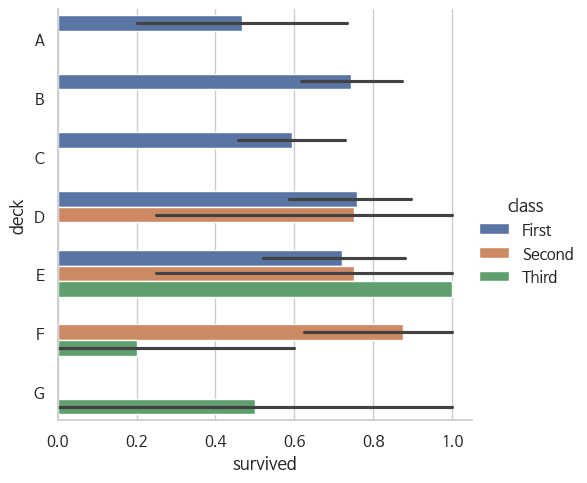

In [71]:
sns.catplot(x="survived", y="deck", data=titanic_df, hue="class", kind="bar");

- F,G 데크가 생존자가 적음

#### 어디서 탔는지?

In [72]:
titanic_df.pivot_table('survived', index="embark_town", columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


<Axes: xlabel='count', ylabel='embark_town'>

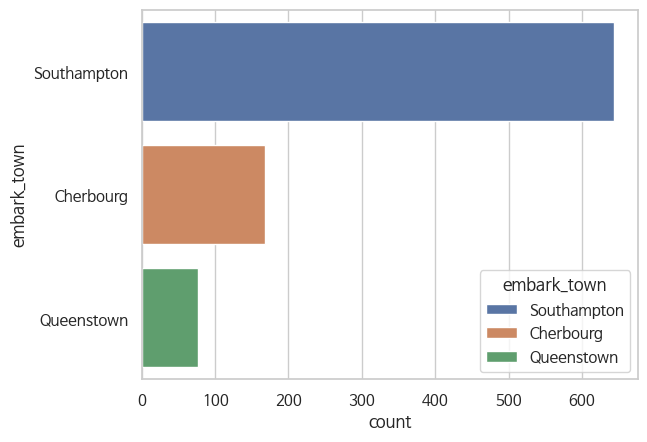

In [79]:
sns.countplot(y="embark_town", data=titanic_df, hue="embark_town")

- Southampton 에서 가장 많이 탐

#### 시각화 - 생존자 중 탑승위치 알아보기(그룹은 class 별로)

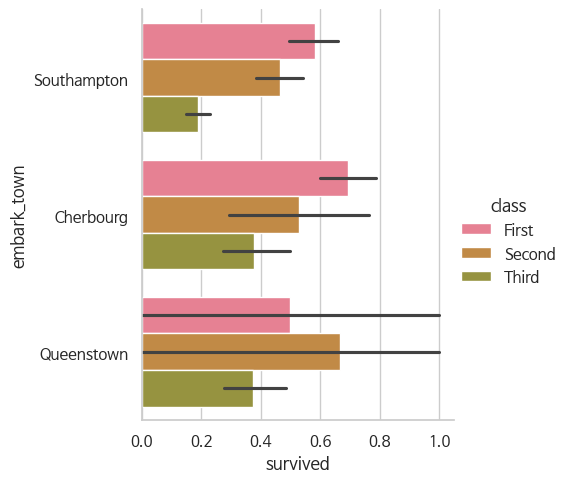

In [ ]:
sns.catplot(x="embark_town", y="embark_town", data="titanic_df", hue="embark_town", kind="bar")

#### 시각화 -  형제 자매, 배우자의 수에 따라 생존율

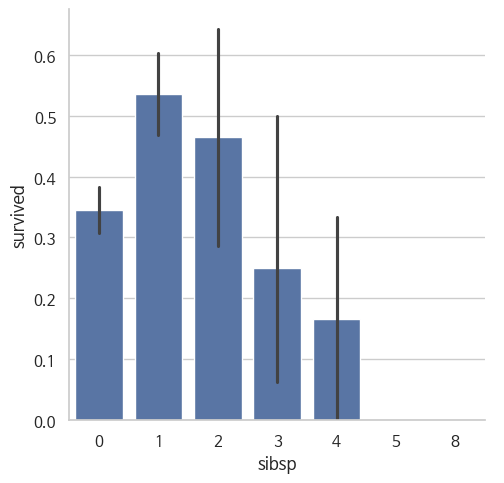

In [81]:
sns.catplot(x="sibsp", y="survived", kind="bar", data=titanic_df);

#### 시각화 -  부모, 자식의 수에 따라 생존율

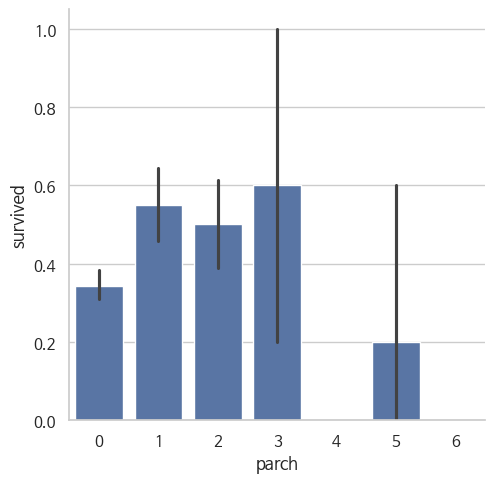

In [82]:
sns.catplot(x="parch", y="survived", kind="bar", data=titanic_df);

- 가족끼리 온 사람이 생존확률이 높음

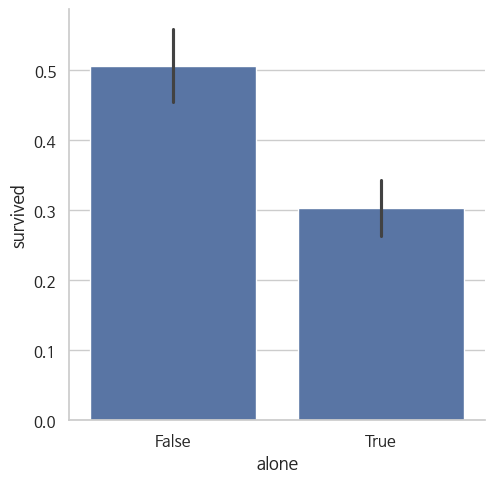

In [83]:
sns.catplot(x="alone", y="survived", kind="bar", data=titanic_df);